<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/PVIC_DifusaoMembrana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o sistema de EDOs
def getf(y):
    n = len(y)
    dx = 1/(n-1)

    f = np.zeros(n)
    # Equação do Primeiro nó (i=1) Dirichlet
    f[0] = 0

    # Equações dos Nós Interiores
    for i in range(1,n-1):
        f[i]=(y[i-1] - 2*y[i] + y[i+1])/(dx*dx)

    # Equação do Último nó (i=n) Dirichlet
    f[n-1]=0
    return f

In [2]:
# Definir o método de resolução dos PVIs

def metodo_euler_explicito(t0, y0, n, h):
    # t0 = valor inicial para t
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y)

    # Inicializa o contador e os vetores de saída para t e y
    k = 0
    t = np.zeros(n)
    y = np.zeros((n,len(y0)))

    # Inicializa t e y com os valores iniciais
    t[0] = t0
    y[0,:] = y0

    # Loop principal para realizar os cálculos
    for k in range(0, n-1):

        y[k+1,:] = y[k,:] + h * getf(y[k,:]) # Atualiza o valor de y usando o método de Euler explícito
        t[k+1] = t[k] + h                    # Incrementa o valor de t

    # Retorna os vetores de saída com os valores de t e y calculados
    return t, y


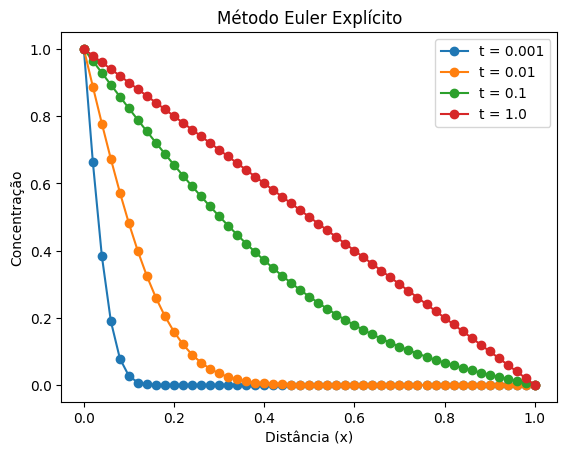

In [7]:
# Definir número de nós e condições iniciais
n = 51
c0 = np.zeros(n)
c0[0]=1

# Definir os parâmetros de integração
t0 = 0           # Escolher o instante inicial
nstep = 10001    # Definir o número de passos
h = 1e-4         # Escolher um passo de integração

# Chamar a função integradora (Solver)
t,c = metodo_euler_explicito(t0, c0, nstep, h)
x = np.linspace(0,1,n)

# Plotar o gráfico
plt.plot(x,c[10,:],'-o')
plt.plot(x,c[100,:],'-o')
plt.plot(x,c[1000,:],'-o')
plt.plot(x,c[10000,:],'-o')
plt.title('Método Euler Explícito')
plt.xlabel('Distância (x)')
plt.ylabel('Concentração')
plt.legend(['t = 0.001', 't = 0.01', 't = 0.1','t = 1.0'])
plt.show()